In [1]:
import numpy as np
import pandas as pd

from random import seed 
from random import gauss 
from random import uniform
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import randint
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import uniform

In [2]:
#binomial distribution
P = 0.5 # unbiased coin or useless vaccine

N_exps = 200000
N_tosses = 95

mu = N_tosses*P

trials = np.random.rand(N_exps,N_tosses) # array of uniform random number between 0 and 1
counts = np.where(trials < P, 1, 0) # corresponding array: 1 for trials with x < P, 0 for all others
results = np.sum(counts, axis=1) # sum across rows to get vector of number of observations in each experiment
unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf
len(unResults)

42

<Figure size 432x288 with 0 Axes>

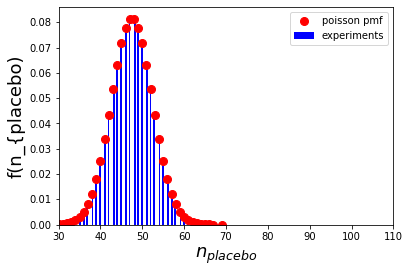

In [3]:
plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.00001, N_tosses, P), binom.ppf(0.999999, N_tosses, P))
#ax.plot(x, binom.pmf(x, N_tosses, P), 'r-',  label='binom pmf')

dataCounts, dataBins = np.histogram(results, bins=100)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

ax.plot(unResults, binom.pmf(unResults, N_tosses,P),'ro', ms=8, label='poisson pmf')

#h = plt.hist(unResults, bins='auto',density=True, label='experiments')
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='experiments', color='b')

plt.xlim(30, 110)
labelx = ax.set_xlabel("$n_{placebo}$", fontsize = 18)
labely = ax.set_ylabel("f(n_{placebo)", fontsize = 18)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

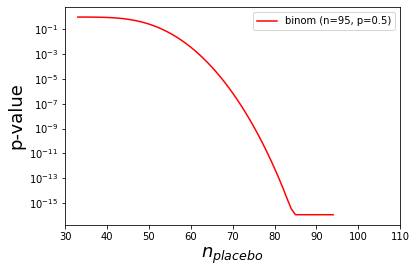

In [4]:
plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.001, N_tosses, P), binom.ppf(0.999999999999999999, N_tosses, P))
ax.plot(x, (1-binom.cdf(x, N_tosses, P)), 'r-',  label='binom (n=95, p=0.5)')
plt.xlim(30, 110)
labelx = ax.set_xlabel("$n_{placebo}$", fontsize = 18)
#labely = ax.set_ylabel("$F(n_{placebo})$", fontsize = 18)
labely = ax.set_ylabel("p-value", fontsize = 18)

plt.yscale("log")
plt.legend()
plt.show()